# What is Machine learning and its types?

- Machine learning is like a teacher who helps computers learn by showing them examples.
- The `more examples` the computer sees, the `better` it learns.

Technical explanation:
Machine learning is when computers `learn to do things without being explicitly programmed`. They do this by `analyzing data` and finding patterns.

---

2 Major types of ML:

- `Supervised`
  - The answer is given. Computers need to learn why that answer.
- `Un-supervised`
  - Answer is not given, computer needs to figure it out.


Task for any Supervised ML model - is to `predict` answers:

- `Regression`: where a number is predicted that's continous in nature. Eg: Predict `house price` by looking at amenities and pictures.
- `Classification`: where a class/group is predicted that's discrete in nature. Eg: Predict if an email is `spam or not`.

Task for any Un-Supervised ML models:

- `Clustering`: Find similar groups in data, Eg: Group pictures of objects together.
- `Association`: Discover rules that describe your data. Eg: people that buy A also tend to buy B, in Amazon.

---

What do `Supervised` ML algorithms do?

- Learn a Mapping From Input to Output. This is also called learning a function.
$$
y = f(x)
$$
    - x -> all the input
    - y -> the output
    - f -> function to transform input to output



   

# Linear Regression

Linear regression is from Statistics, it's a very efficient algo for regression when the relationship between variables are linear in nature.

Equation:
$$
y = mx+c
$$
Where
- x -> $input$
- y -> $output$
- m,c -> $coefficient$

Formula to calculate:

$$
m = \frac{\sum_{i=1}^{n}(x_{i} − mean(x)) × (y_{i} − mean(y))}{\sum_{i=1}^{n}(x_{i} − mean(x))^{2}}
$$
&nbsp;
$$
c = mean(y) − m × mean(x)
$$

Estimating error:
$$
RMSE = \sqrt{\frac{\sum_{i=1}^n (p_i - {y}_i)^2}{n}}
$$

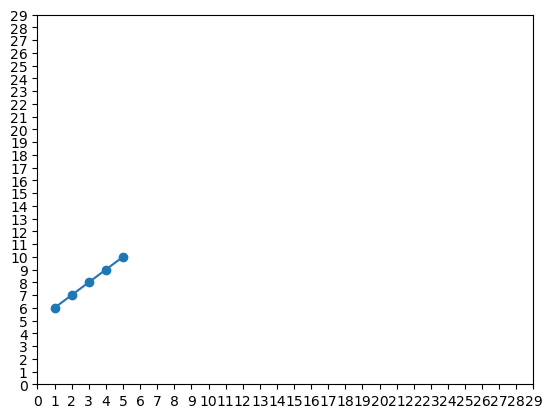

In [5]:
"""
M values -> 0,1,2,3,4,5
C values -> 0 - 30
"""

import matplotlib.pyplot as plt
import numpy as np

# Get the 'm' and 'c' values of the line
m = 1
c = 5

# Generate a range of x values
x = np.array([1,2,3,4,5])
# Calculate the y values for the given x values
y = m * x + c
# Plot the line
plt.scatter(x, y)
plt.plot(x,y)
plt.xticks(range(0, 30))
plt.yticks(range(0, 30))
plt.show()

In [ ]:
# Things to do to your data before using Linear regression on it.

- `Linear Assumption`: Linear regression assumes that the relationship between your input and output is linear. It does not support anything else. This may be obvious, but it is good to remember when you have a lot of attributes. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).
- `Remove Noise`: Linear regression assumes that your input and output variables are not noisy. Consider using data cleaning operations that let you better expose and clarify the signal in your data. This is most important for the output variable and you want to remove outliers in the output variable (y) if possible.
- `Gaussian Distributions`: Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution. You may get some benefit using transforms (e.g. log or BoxCox) on your variables to make their distribution more Gaussian looking.
- `Rescale Inputs`: Linear regression will often make more reliable predictions if you rescale
input variables using standardization or normalization.

Estimated Coefficients: 
m = 137.72727272727272 
c = -7.5


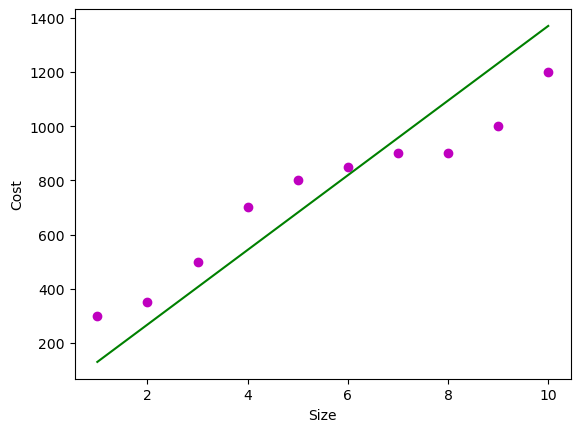

In [6]:
def estimate_coefficients(x,y):
    n = np.size(x)
    mean_x, mean_y = np.mean(x), np.mean(y)
    SS_xy = np.sum(y*x - n*mean_y*mean_x)
    SS_xx = np.sum(x*x -n*mean_x*mean_x)
    m = SS_xy /SS_xx
    c = mean_y - m*mean_x
    return(m,c)
def plot_regression_line(x,y,m,c):
    plt.scatter(x,y,color = 'm',marker="o")
    y_pred = c+m*x
    plt.plot(x,y_pred,color = 'g')
    plt.xlabel('Size')
    plt.ylabel('Cost')
    plt.show()
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([300,350,500,700,800,850,900,900,1000,1200])

m,c = estimate_coefficients(x,y)
print("Estimated Coefficients: \nm = {} \nc = {}".format(m,c))
plot_regression_line(x,y,m,c)

# Scikit learn - Linear regression

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


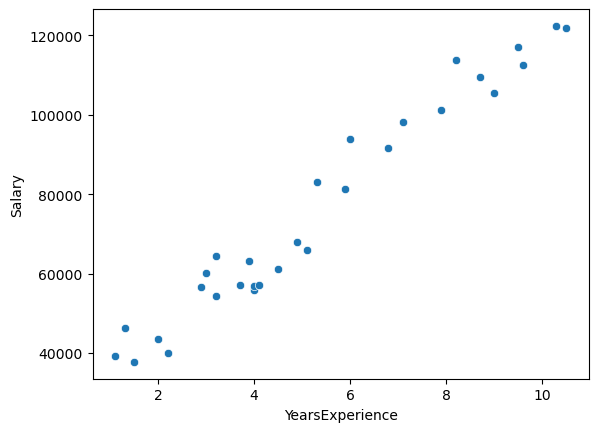

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Load the dataframe
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/simple-Linear-Regression/master/Salary_Data.csv')
print(df)
sns.scatterplot(data=df,x='YearsExperience',y='Salary')
plt.show()

In [8]:
# Extract the year of experience and salary columns
year_of_experience = df["YearsExperience"].values
salary = df["Salary"].values

year_of_experience = year_of_experience.reshape(-1,1)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(year_of_experience, salary)

# Get the coefficients
c = model.intercept_
m = model.coef_[0]

print(f"M:{m}, C:{c}")

M:9449.962321455074, C:25792.20019866871


In [9]:
new_experience = 5

# Predict the salary for a year of experience of 5
predicted_salary = model.predict([[new_experience]])

# Print the predicted salary
print("Predicted Salary:",predicted_salary[0])

Predicted Salary: 73042.01180594409
